# Introduction to Computer Vision: Plant Seedlings Classification

## Problem Statement

### Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term. The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can actually benefit the workers in this field, as **the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning.** The ability to do so far more efficiently and even more effectively than experienced manual labor, could lead to better crop yields, the freeing up of human inolvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.


### Objective

The aim of this project is to Build a Convolutional Neural Netowrk to classify plant seedlings into their respective categories.

### Data Dictionary

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing **images of unique plants belonging to 12 different species.**

- The dataset can be download from Olympus.
- The data file names are:
    - images.npy
    - Labels.csv
- Due to the large volume of data, the images were converted to the images.npy file and the labels are also put into Labels.csv, so that you can work on the data/project seamlessly without having to worry about the high data volume.

- The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Species**

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

### **Note: Please use GPU runtime on Google Colab to execute the code faster.**

## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 opencv-python==4.8.0.76 -q --user

In [2]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
!pip install tensorflow==2.13.0 scikit-learn==1.2.2 seaborn==0.11.1 matplotlib==3.3.4 numpy==1.24.3 pandas==1.5.2 opencv-python==4.8.0.76 opencv-python -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [3]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs
import random                                                                                    # Importing random to generate random seeds

# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from tensorflow.keras import backend                                                             # Importing the backend
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix                                                     # Importing confusion_matrix to plot the confusion matrix

# For label encoding
from sklearn.preprocessing import LabelBinarizer                                                 # Importing cv2_imshow from google.patches to display images

# For callbacks
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [4]:
# Uncomment and run the below code if you are using google colab
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
# Load the image file of the dataset
images = np.load('./images.npy')

# Load the labels file of the dataset
labels = pd.read_csv('./Labels.csv')

## Data Overview

### Understand the shape of the dataset

In [6]:
print(images.shape)
print(labels.shape)

(4750, 128, 128, 3)
(4750, 1)


## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you understand the data better.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

1. How are these different category plant images different from each other?
2. Is the dataset provided an imbalance? (Check with using bar plots)

In [7]:
#auxiliary function to plot images
def plot_images(images,labels):
  num_classes=12                                                                  # Number of Classes
  categories=np.unique(labels)
  keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
  rows = 6                                                                        # Defining number of rows=3
  cols = 6                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image
          ax.set_title(keys[random_index])
  plt.show()

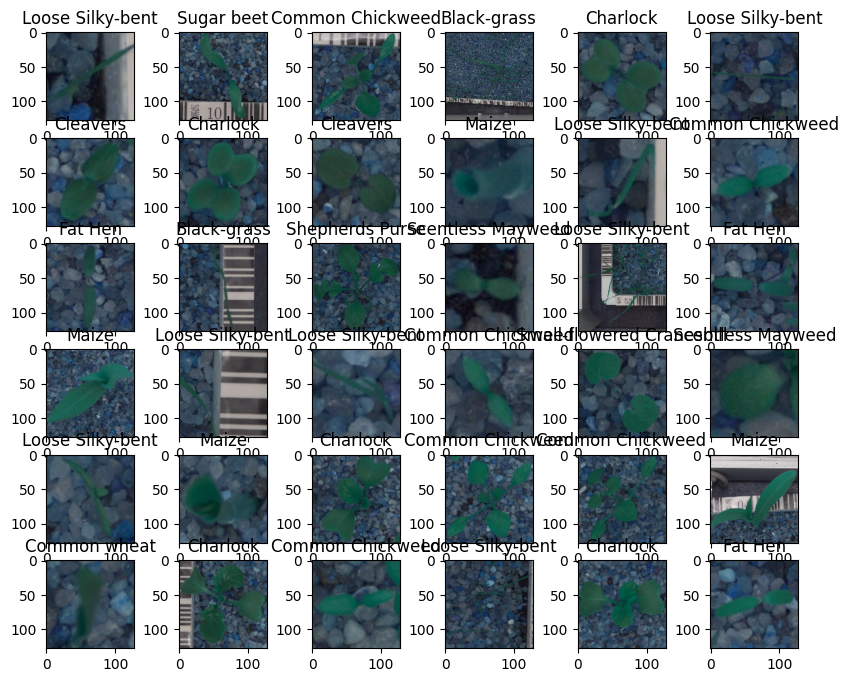

In [8]:
plot_images(images,labels)

Note: the weeds seems to difer in size, shape and number of leafs.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Small-flowered Cranesbill'),
  Text(1, 0, 'Fat Hen'),
  Text(2, 0, 'Shepherds Purse'),
  Text(3, 0, 'Common wheat'),
  Text(4, 0, 'Common Chickweed'),
  Text(5, 0, 'Charlock'),
  Text(6, 0, 'Cleavers'),
  Text(7, 0, 'Scentless Mayweed'),
  Text(8, 0, 'Sugar beet'),
  Text(9, 0, 'Maize'),
  Text(10, 0, 'Black-grass'),
  Text(11, 0, 'Loose Silky-bent')])

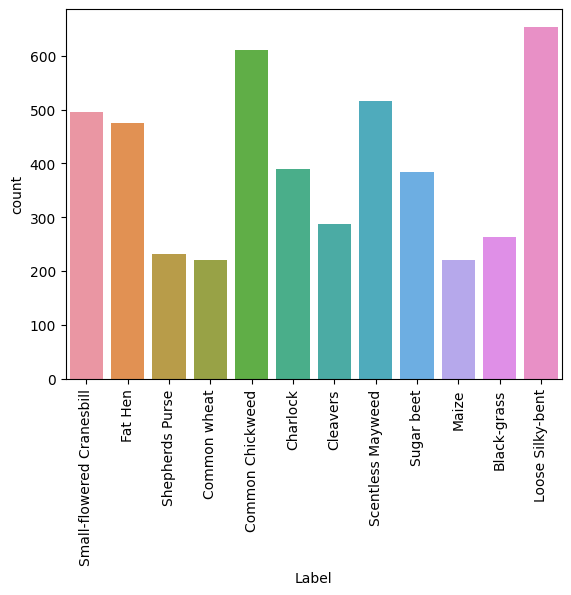

In [9]:
 sns.countplot(labels['Label'])
 plt.xticks(rotation='vertical')

The data is imbalanced, as we can see from the bar plot above. The number of images for each category is different.

1. How are these different category plant images different from each other?
    
    A: They vary in size, shape, and number of leaves.

2. Is the dataset provided an imbalance? (Check with using bar plots)
   
    A: Yes, the dataset is imbalanced.
    

## Data Pre-Processing

### Convert the BGR images to RGB images.

In [10]:
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

easy to do by just using the cv2 library.

### Resize the images

As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

In [11]:
images_decreased=[]
height = 64
width = 64
dimensions = (width, height)
for i in range(len(images)):
  images_decreased.append( cv2.resize(images[i], dimensions, interpolation=cv2.INTER_LINEAR))

Images were resized to 64x64 pixels. lets check the shape of the images.

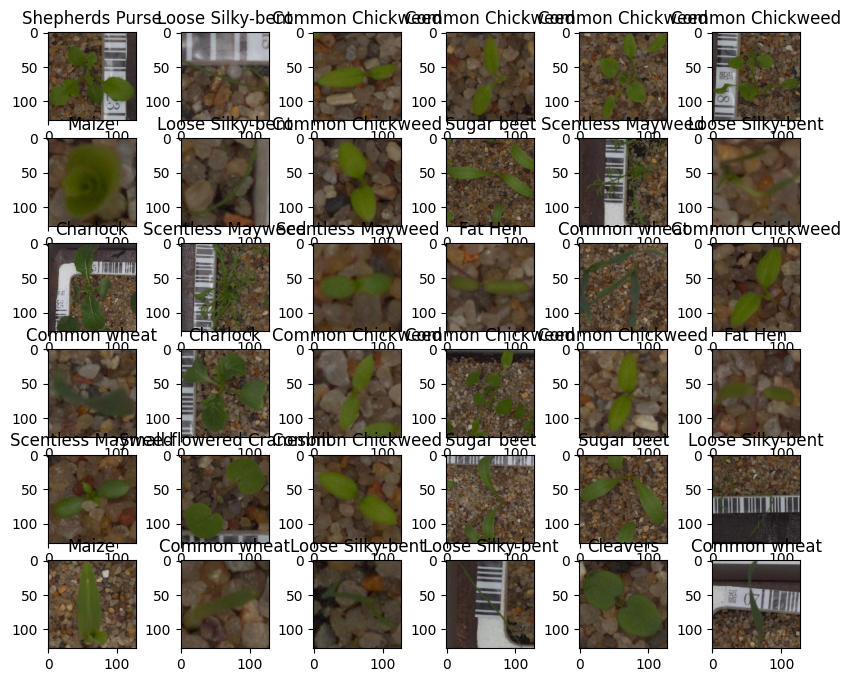

In [12]:
plot_images(images,labels)

Lots of details are still observable in the images, even after resizing them to 64x64 pixels.

### Data Preparation for Modeling

- Before you proceed to build a model, you need to split the data into train, test, and validation to be able to evaluate the model that you build on the train data
- You'll have to encode categorical features and scale the pixel values.
- You will build a model using the train data and then check its performance

**Split the dataset**

In [13]:
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(np.array(images_decreased),labels , test_size=0.1, random_state=42,stratify=labels)
X_train, X_val, y_train, y_val = train_test_split(X_temp,y_temp , test_size=0.1, random_state=42,stratify=y_temp)

print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(3847, 64, 64, 3) (3847, 1)
(428, 64, 64, 3) (428, 1)
(475, 64, 64, 3) (475, 1)


### Encode the target labels

In [14]:
# Convert labels from names to one vectors.
enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_val_encoded=enc.transform(y_val)
y_test_encoded=enc.transform(y_test)

### Data Normalization

In [15]:
# Normalizing the image pixels
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0


## Model Building

In [16]:

#Build aux function to create a new model (that way we can ensure that the model is always created in the same way)
def new_model():
    # Clearing backend
    backend.clear_session()
    
    # Fixing the seed for random number generators
    np.random.seed(42)
    random.seed(42)
    tf.random.set_seed(42)
    # Intializing a sequential model
    model = Sequential()

    # Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
    # Input_shape denotes input image dimension of images
    model.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

    # Adding max pooling to reduce the size of output of first conv layer
    model.add(MaxPooling2D((2, 2), padding = 'same'))

    model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
    model.add(MaxPooling2D((2, 2), padding = 'same'))

    # flattening the output of the conv layer after max pooling to make it ready for creating dense connections
    model.add(Flatten())

    # Adding a fully connected dense layer with 100 neurons
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.3))
    # Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem with 12 classes
    model.add(Dense(12, activation='softmax'))
    
    opt=Adam()
    # Compile model
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    return model


In [17]:
model1 = new_model()
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 16)                1

In [18]:
#lets train the model
history_1 = model1.fit(
            X_train_normalized, y_train_encoded,
            epochs=50,
            validation_data=(X_val_normalized,y_val_encoded),
            batch_size=150,
            verbose=2
)

Epoch 1/50
26/26 - 2s - loss: 2.4705 - accuracy: 0.1029 - val_loss: 2.4413 - val_accuracy: 0.1402 - 2s/epoch - 82ms/step
Epoch 2/50
26/26 - 2s - loss: 2.4221 - accuracy: 0.1450 - val_loss: 2.3678 - val_accuracy: 0.1495 - 2s/epoch - 73ms/step
Epoch 3/50
26/26 - 2s - loss: 2.3414 - accuracy: 0.1684 - val_loss: 2.2856 - val_accuracy: 0.2360 - 2s/epoch - 73ms/step
Epoch 4/50
26/26 - 2s - loss: 2.2487 - accuracy: 0.2178 - val_loss: 2.2107 - val_accuracy: 0.3201 - 2s/epoch - 73ms/step
Epoch 5/50
26/26 - 2s - loss: 2.1866 - accuracy: 0.2545 - val_loss: 2.0637 - val_accuracy: 0.3481 - 2s/epoch - 73ms/step
Epoch 6/50
26/26 - 2s - loss: 2.1123 - accuracy: 0.2659 - val_loss: 2.0007 - val_accuracy: 0.3575 - 2s/epoch - 73ms/step
Epoch 7/50
26/26 - 2s - loss: 2.0859 - accuracy: 0.2644 - val_loss: 1.9176 - val_accuracy: 0.3411 - 2s/epoch - 73ms/step
Epoch 8/50
26/26 - 2s - loss: 2.0193 - accuracy: 0.2839 - val_loss: 1.8638 - val_accuracy: 0.3551 - 2s/epoch - 74ms/step
Epoch 9/50
26/26 - 2s - loss: 2.

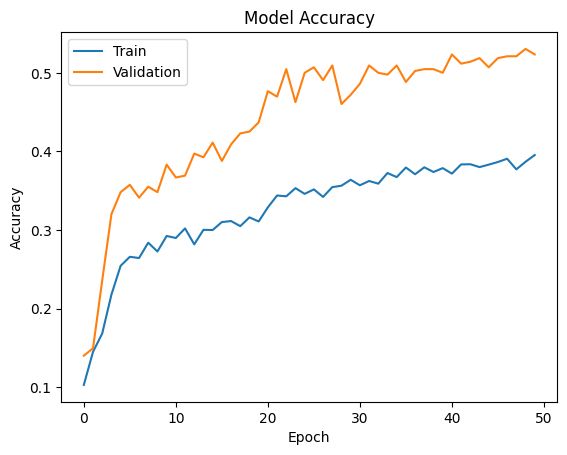

In [19]:
#now lets evaluate the model
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Afetr analizing the model results we can see the the results are not significantly better than 50%. lets try to improve the model by using different training methods.

## Model Performance Improvement

**Reducing the Learning Rate:**

**Hint**: Use **ReduceLRonPlateau()** function that will be used to decrease the learning rate by some factor, if the loss is not decreasing for some time. This may start decreasing the loss at a smaller learning rate. There is a possibility that the loss may still not decrease. This may lead to executing the learning rate reduction again in an attempt to achieve a lower loss.

In [20]:
model2 = new_model()
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 16)                1

In [21]:
# Define the callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_lr=0.0015)

#lets train the model
history_2 = model2.fit(
            X_train_normalized, y_train_encoded,
            epochs=50,
            validation_data=(X_val_normalized,y_val_encoded),
            batch_size=150,
            verbose=2, 
            callbacks=[reduce_lr]
)

Epoch 1/50
26/26 - 2s - loss: 2.4705 - accuracy: 0.1029 - val_loss: 2.4413 - val_accuracy: 0.1402 - lr: 0.0010 - 2s/epoch - 80ms/step
Epoch 2/50
26/26 - 2s - loss: 2.4221 - accuracy: 0.1450 - val_loss: 2.3678 - val_accuracy: 0.1495 - lr: 0.0010 - 2s/epoch - 74ms/step
Epoch 3/50
26/26 - 2s - loss: 2.3414 - accuracy: 0.1684 - val_loss: 2.2856 - val_accuracy: 0.2360 - lr: 0.0010 - 2s/epoch - 75ms/step
Epoch 4/50
26/26 - 2s - loss: 2.2487 - accuracy: 0.2178 - val_loss: 2.2107 - val_accuracy: 0.3201 - lr: 0.0010 - 2s/epoch - 77ms/step
Epoch 5/50
26/26 - 2s - loss: 2.1866 - accuracy: 0.2545 - val_loss: 2.0637 - val_accuracy: 0.3481 - lr: 0.0010 - 2s/epoch - 85ms/step
Epoch 6/50
26/26 - 2s - loss: 2.1123 - accuracy: 0.2659 - val_loss: 2.0007 - val_accuracy: 0.3575 - lr: 0.0010 - 2s/epoch - 75ms/step
Epoch 7/50
26/26 - 2s - loss: 2.0859 - accuracy: 0.2644 - val_loss: 1.9176 - val_accuracy: 0.3411 - lr: 0.0010 - 2s/epoch - 74ms/step
Epoch 8/50
26/26 - 2s - loss: 2.0193 - accuracy: 0.2839 - val_

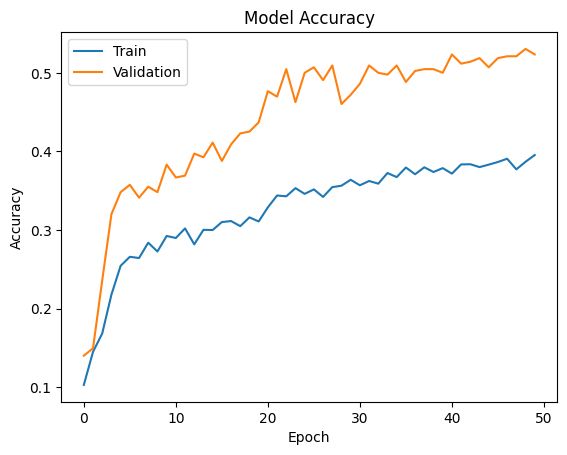

In [22]:
#now lets evaluate the model
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Terrible results, there was was a small learning and final results is the same as the previous model.

### **Data Augmentation**

Remember, **data augmentation should not be used in the validation/test data set**.

In [23]:
model3 = new_model()
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 16)                1

In [24]:
#createing image data generator
train_datagen = ImageDataGenerator(
                              rotation_range=20,
                              fill_mode='nearest'
                              )

#lets train the model
history_3 = model3.fit(
            train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=150,
                                       seed=42,
                                       shuffle=False),
            epochs=50,
            validation_data=(X_val_normalized,y_val_encoded),
            verbose=2
)

Epoch 1/50
26/26 - 2s - loss: 2.4592 - accuracy: 0.1040 - val_loss: 2.4353 - val_accuracy: 0.1846 - 2s/epoch - 89ms/step
Epoch 2/50
26/26 - 2s - loss: 2.4082 - accuracy: 0.1308 - val_loss: 2.3607 - val_accuracy: 0.2336 - 2s/epoch - 81ms/step
Epoch 3/50
26/26 - 2s - loss: 2.3330 - accuracy: 0.2002 - val_loss: 2.2267 - val_accuracy: 0.3201 - 2s/epoch - 80ms/step
Epoch 4/50
26/26 - 2s - loss: 2.2268 - accuracy: 0.2469 - val_loss: 2.1179 - val_accuracy: 0.3318 - 2s/epoch - 82ms/step
Epoch 5/50
26/26 - 2s - loss: 2.1633 - accuracy: 0.2584 - val_loss: 2.0583 - val_accuracy: 0.3481 - 2s/epoch - 81ms/step
Epoch 6/50
26/26 - 2s - loss: 2.1018 - accuracy: 0.2641 - val_loss: 1.9710 - val_accuracy: 0.3762 - 2s/epoch - 82ms/step
Epoch 7/50
26/26 - 2s - loss: 2.0498 - accuracy: 0.2805 - val_loss: 1.9124 - val_accuracy: 0.3972 - 2s/epoch - 82ms/step
Epoch 8/50
26/26 - 2s - loss: 2.0315 - accuracy: 0.2953 - val_loss: 1.9239 - val_accuracy: 0.4206 - 2s/epoch - 82ms/step
Epoch 9/50
26/26 - 2s - loss: 1.

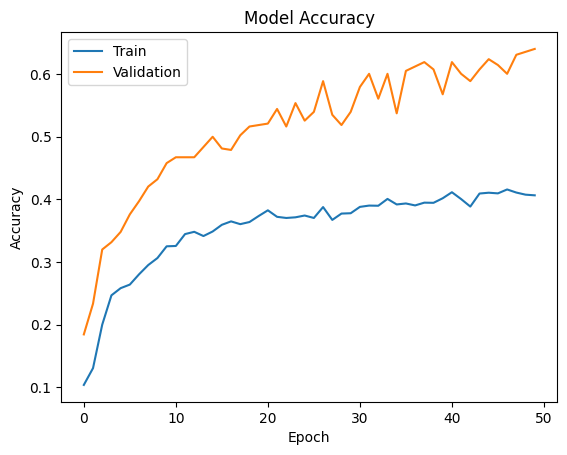

In [25]:
#now lets evaluate the model
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Final Model

Comment on the final model you have selected and use the same in the below code to visualize the image.

The best model of the the 3 approachs is using the data augmentation, as it has the best accuracy and loss results. hitting 64% accuracy and 1.21 loss. Now lets run it agains the test data

In [26]:
accuracy = model3.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 1.2849 - accuracy: 0.6084 - 97ms/epoch - 6ms/step


In [27]:
# Here we would get the output as probablities for each category
y_pred = model3.predict(X_test_normalized)

15/15 [==============================] - 0s 6ms/step


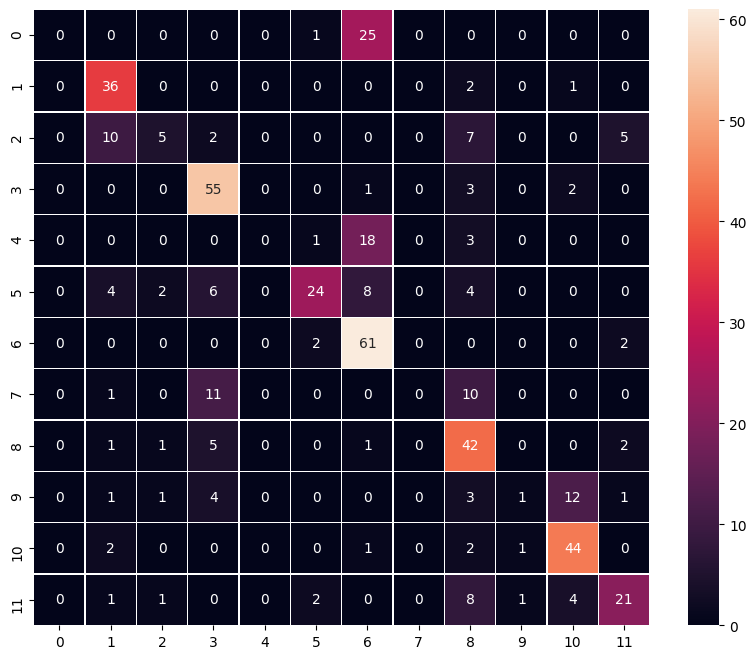

In [28]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

The model did well in a few of the categories, with the best result in the 6th category.

### Visualizing the prediction

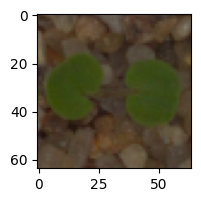

1/1 [==============================] - 0s 11ms/step
Predicted Label ['Small-flowered Cranesbill']
True Label Small-flowered Cranesbill


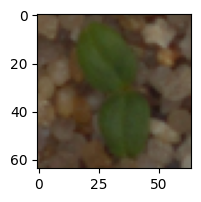

1/1 [==============================] - 0s 10ms/step
Predicted Label ['Scentless Mayweed']
True Label Cleavers


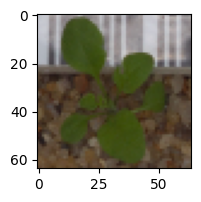

1/1 [==============================] - 0s 9ms/step
Predicted Label ['Small-flowered Cranesbill']
True Label Shepherds Purse


In [29]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()
print('Predicted Label', enc.inverse_transform(model3.predict((X_test_normalized[2].reshape(1,64,64,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[2])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[33])
plt.show()
print('Predicted Label', enc.inverse_transform(model3.predict((X_test_normalized[33].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[33])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[36])
plt.show()
print('Predicted Label', enc.inverse_transform(model3.predict((X_test_normalized[36].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[36])                                              # using inverse_transform() to get the output label from the output vector

## Actionable Insights and Business Recommendations

* Improve Model Performance with Additional Data: The current model could benefit from incorporating more diverse training data, especially in cases where the performance for certain categories or classes was below average. Expanding the dataset to include underrepresented cases can help improve accuracy and robustness, especially in edge cases.

* Fine-Tuning Hyperparameters: The model's performance could be further optimized by fine-tuning hyperparameters such as learning rate, batch size, and optimizer settings. Experimenting with different configurations can help identify the most effective settings for the given dataset and model architecture.

* Transfer Learning: Consider using transfer learning to leverage pre-trained models and architectures that have been trained on large datasets. By fine-tuning these models on the plant seedlings dataset, it may be possible to achieve better performance with less training data and computational resources.

_____